In [78]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
acs_dataframe_raw = pd.read_csv('Datathon_Data/acs_5yr_est_selected_economic_characteristics_2010-2022.csv')
meat_production_raw = pd.read_csv('Datathon_Data/Meat_Stats_Meat_Production.csv')
nutrition_raw = pd.read_csv('Datathon_Data/Nutrition_Physical_Activity_and_Obesity_Data.csv')
acs_dataframe = acs_dataframe_raw.copy()
meat_production = meat_production_raw.copy()
nutrition = nutrition_raw.copy()
meat_production['Production'] = meat_production['Production'].str.replace(",","").astype(float)
print(acs_dataframe_raw['Label (Grouping)'].unique())

/var/folders/96/s7zm7_qd5tl766bx8kyp31gm0000gn/T/ipykernel_68267/2948597331.py:3: DtypeWarning: Columns (18,19,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  nutrition_raw = pd.read_csv('Datathon_Data/Nutrition_Physical_Activity_and_Obesity_Data.csv')


['EMPLOYMENT STATUS' 'Population 16 years and over'
 '\xa0\xa0\xa0\xa0In labor force'
 '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Civilian labor force'
 '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Employed'
 '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Unemployed'
 '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Armed Forces'
 '\xa0\xa0\xa0\xa0Not in labor force'
 '\xa0\xa0\xa0\xa0Civilian labor force'
 '\xa0\xa0\xa0\xa0Percent Unemployed' 'Females 16 years and over'
 'Own children under 6 years'
 '\xa0\xa0\xa0\xa0All parents in family in labor force'
 'Own children 6 to 17 years' 'COMMUTING TO WORK'
 'Workers 16 years and over'
 '\xa0\xa0\xa0\xa0Car, truck, or van -- drove alone'
 '\xa0\xa0\xa0\xa0Car, truck, or van -- carpooled'
 '\xa0\xa0\xa0\xa0Public transportation (excluding taxicab)'
 '\xa0\xa0\xa0\xa0Walked' '\xa0\xa0\xa0\xa0Other means'
 '\xa0\xa0\xa0\xa0Worked at home'
 '\xa0\xa0\xa0\xa0Mean travel time to work (minutes)' 'OCCUPATION'
 'Civilian employed population 16 years and over'
 '\xa0\

In [80]:
acs_dataframe['Label (Grouping)'] = acs_dataframe['Label (Grouping)'].str.strip()
employed = acs_dataframe[(acs_dataframe['Label (Grouping)'] == 'Employed')].copy()
employed['Estimate'] = employed['Estimate'].str.replace(",", "").astype(int)
public_coverage = acs_dataframe[(acs_dataframe['Label (Grouping)'] == 'With public coverage') 
                                & (acs_dataframe['Estimate'] != '(X)')].copy()
public_coverage['Estimate'] = public_coverage['Estimate'].str.replace(",", "").astype(float)
public_transportation = acs_dataframe[acs_dataframe['Label (Grouping)'] == 'Public transportation (excluding taxicab)'].copy()
public_transportation['Estimate'] = public_transportation['Estimate'].str.replace(",","").astype(float)
food_stamp_SNAP = acs_dataframe[acs_dataframe['Label (Grouping)'] == 'With Food Stamp/SNAP benefits in the past 12 months'].copy()
food_stamp_SNAP['Estimate'] = food_stamp_SNAP['Estimate'].str.replace(",","").astype(float)
travel_time_to_work = acs_dataframe[acs_dataframe['Label (Grouping)'] == 'Mean travel time to work (minutes)'].copy()
travel_time_to_work['Estimate'] = travel_time_to_work['Estimate'].str.replace(",","").astype(float)
travel_time_to_work.head(10)

,Label (Grouping),Category,State,Estimate,Margin of Error,Percent,Percent Margin of Error,Year
26,Mean travel time to work (minutes),COMMUTING TO WORK,Alabama,23.9,±0.1,(X),(X),2010
171,Mean travel time to work (minutes),COMMUTING TO WORK,Alaska,18.1,±0.3,(X),(X),2010
316,Mean travel time to work (minutes),COMMUTING TO WORK,Arizona,24.8,±0.1,(X),(X),2010
461,Mean travel time to work (minutes),COMMUTING TO WORK,Arkansas,21.1,±0.1,(X),(X),2010
606,Mean travel time to work (minutes),COMMUTING TO WORK,California,26.9,±0.1,(X),(X),2010
751,Mean travel time to work (minutes),COMMUTING TO WORK,Colorado,24.2,±0.1,(X),(X),2010
896,Mean travel time to work (minutes),COMMUTING TO WORK,Connecticut,24.6,±0.1,(X),(X),2010
1041,Mean travel time to work (minutes),COMMUTING TO WORK,Delaware,24.1,±0.3,(X),(X),2010
1186,Mean travel time to work (minutes),COMMUTING TO WORK,District of Columbia,29.3,±0.3,(X),(X),2010
1331,Mean travel time to work (minutes),COMMUTING TO WORK,Florida,25.7,±0.1,(X),(X),2010


Year                          int64
Employed                      int64
Meat_Production             float64
Public_Coverage             float64
Obesity                     float64
Public_Transportation       float64
Food_Stamp_SNAP             float64
Mean_Travel_Time_To_Work    float64
dtype: object

/var/folders/96/s7zm7_qd5tl766bx8kyp31gm0000gn/T/ipykernel_68267/1041746839.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  yearly_df = pd.concat([yearly_df, pd.DataFrame({'Year': [year],


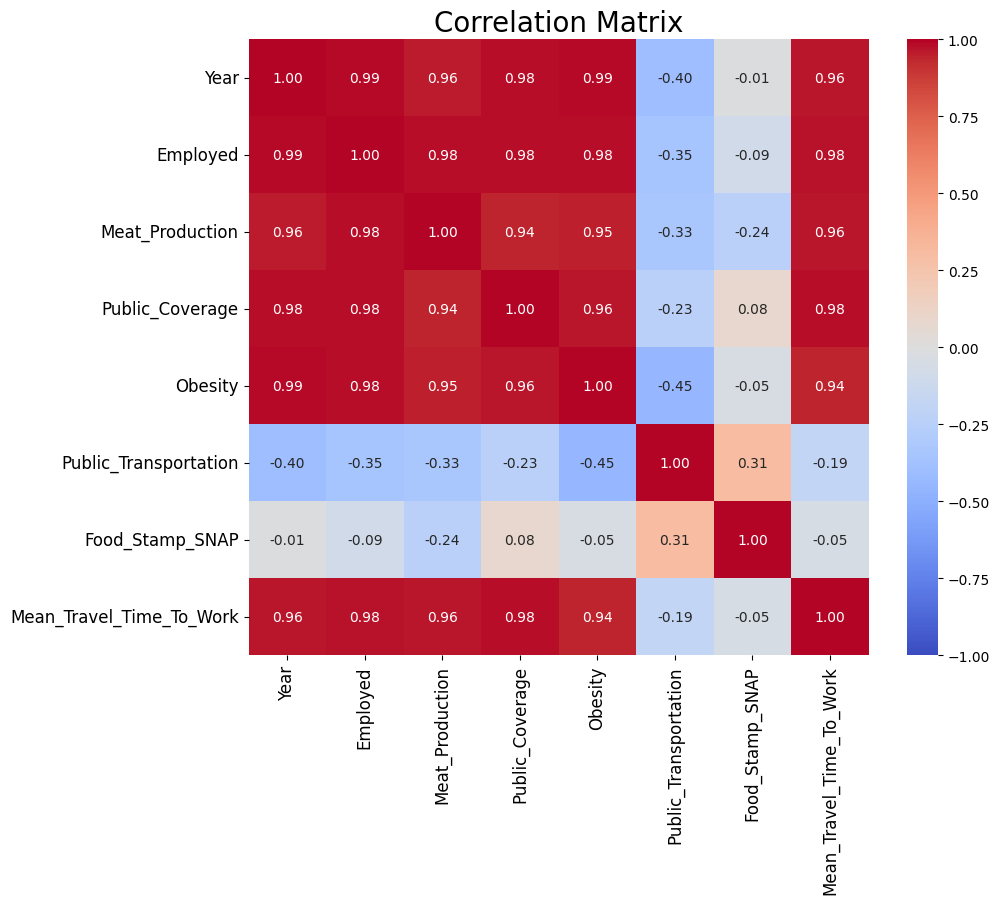

                              Year  Employed  Meat_Production  \
Year                      1.000000  0.991997         0.957357   
Employed                  0.991997  1.000000         0.981279   
Meat_Production           0.957357  0.981279         1.000000   
Public_Coverage           0.982592  0.981897         0.943883   
Obesity                   0.990776  0.981622         0.949928   
Public_Transportation    -0.404220 -0.353264        -0.330433   
Food_Stamp_SNAP          -0.009309 -0.089213        -0.237545   
Mean_Travel_Time_To_Work  0.963432  0.976265         0.962578   

                          Public_Coverage   Obesity  Public_Transportation  \
Year                             0.982592  0.990776              -0.404220   
Employed                         0.981897  0.981622              -0.353264   
Meat_Production                  0.943883  0.949928              -0.330433   
Public_Coverage                  1.000000  0.962757              -0.234551   
Obesity                 

In [81]:
yearly_df = pd.DataFrame(columns=['Year', 'Employed', 'Meat_Production', 'Public_Coverage', 
                                  'Obesity', 'Public_Transportation', 'Food_Stamp_SNAP', 'Mean_Travel_Time_To_Work'])
for year in range(2012, 2023):
    total_employed = (employed[employed['Year'] == year]['Estimate'].sum())
    total_meat_production = meat_production[meat_production['Year'] == year]['Production'].sum()
    total_public_coverage = public_coverage[public_coverage['Year'] == year]['Estimate'].sum()
    mean_obesity_us = nutrition[(nutrition['YearEnd'] == year) & 
                                (nutrition['Question'] == 'Percent of adults aged 18 years and older who have obesity')]['Data_Value'].mean()
    total_public_transportation = public_transportation[public_transportation['Year'] == year]['Estimate'].sum()
    total_food_stamp_SNAP = food_stamp_SNAP[food_stamp_SNAP['Year'] == year]['Estimate'].sum()
    mean_travel_time_to_work = travel_time_to_work[travel_time_to_work['Year'] == year]['Estimate'].mean()
    yearly_df = pd.concat([yearly_df, pd.DataFrame({'Year': [year], 
                                                    'Employed': [total_employed], 
                                                    'Meat_Production': [total_meat_production],
                                                    'Public_Coverage': [total_public_coverage],
                                                    'Obesity' : [mean_obesity_us],
                                                    'Public_Transportation': [total_public_transportation],
                                                    'Food_Stamp_SNAP': [total_food_stamp_SNAP]})], ignore_index=True)

for feature in yearly_df.columns:
    yearly_df[feature] = pd.to_numeric(yearly_df[feature], errors="coerce")
    
print(yearly_df.dtypes)
corr_mat = yearly_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, center=0)

plt.title('Correlation Matrix', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()
print(corr_mat)


### Now we aim to build a robust regression model that could be potentially used to predict future obesity rate in the United States.

In [82]:
yearly_df = sm.add_constant(yearly_df)
X = yearly_df[['Public_Transportation', 'Employed', 'Food_Stamp_SNAP']]
Y = yearly_df['Obesity']
model = sm.OLS(Y, X).fit()

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                Obesity   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.104e+04
Date:                Thu, 01 Aug 2024   Prob (F-statistic):                    8.36e-15
Time:                        10:27:00   Log-Likelihood:                         -7.6052
No. Observations:                  11   AIC:                                      21.21
Df Residuals:                       8   BIC:                                      22.40
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

/Users/tony/myenv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.
  return hypotest_fun_in(*args, **kwds)
